<a href="https://colab.research.google.com/github/TechJonesAi/ImageAi/blob/master/copy_of_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INITIATE RUNTIME GPU**

In [52]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [54]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_drive = "/content/gdrive/My Drive/"
base_drive = root_drive + 'Flowers'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

**RUN ONE BY ONE RUN GOLD FISH FIRST, THEN RUN PATH = PATH('/CONTENT/GDRIVE.... THEN RUN DOWNLOAD_IMAGES(PATH/FILE..... REPEAT PROCESS**

In [0]:
folder = 'Aconitum'
file = 'Aconitum.txt'

In [0]:
folder = 'Daffodil'
file = 'Daffodil.txt'

In [0]:
folder = 'Hibiscus'
file = 'Hibiscus.txt'

In [0]:
folder = 'Roses'
file = 'Roses.txt'

In [0]:
path = Path('//content/gdrive/My Drive/Colab Notebooks/Flowers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

**REMOVE IMAGES THAT CAN'T OPEN OR CORRUPT**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [23]:
data.classes

['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

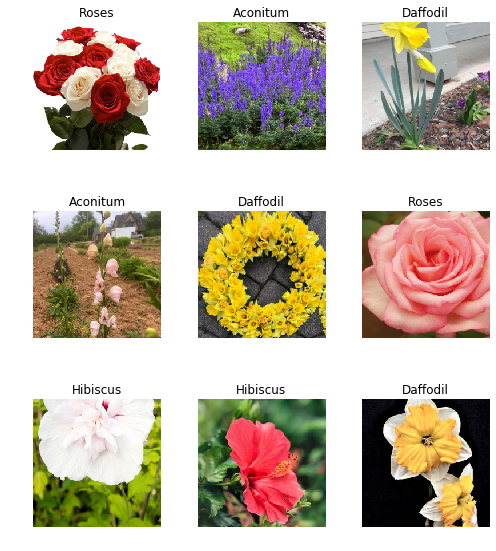

In [24]:
data.show_batch(rows=3, figsize=(7,8))

**VIsually Check Images**

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aconitum', 'Daffodil', 'Hibiscus', 'Roses'], 4, 611, 152)

**TRAIN MODEL**

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 103533099.55it/s]


In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.279815,0.314882,0.039474,00:39
1,0.714489,0.112766,0.019737,00:38
2,0.483908,0.111609,0.026316,00:39
3,0.357982,0.115335,0.032895,00:40


In [0]:
learn.save('stage-1')

In [29]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.086799,0.119465,0.039474,00:39
1,0.082824,0.123465,0.039474,00:39


In [0]:
learn.save('stage-2')

In [31]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.063912,0.119652,0.039474,00:39
1,0.060038,0.116374,0.039474,00:39


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


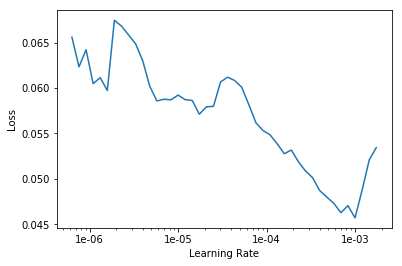

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.050515,0.106479,0.046053,00:40
1,0.043006,0.100498,0.039474,00:39


In [0]:
learn.save('stage-3')

In [38]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.034701,0.103261,0.026316,00:40
1,0.025754,0.103013,0.019737,00:39


In [0]:
learn.save('stage-4')

**THAT LOOKS BETTER.... TRAINING ALL DONE**

In [0]:
learn.load('stage-4');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

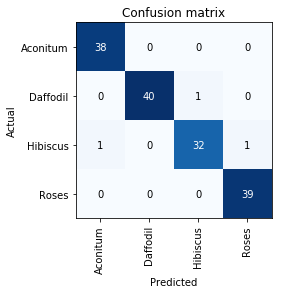

In [42]:
interp.plot_confusion_matrix()

**PREPARE FOR EXPORT**

**Predicted Right**

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

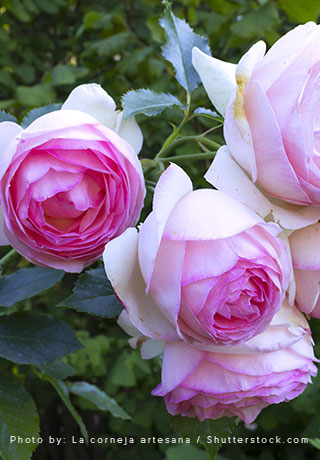

In [47]:
img = open_image(path/'Roses'/'00000199.jpg')
img

In [0]:
learn = load_learner(path)

In [51]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Roses